In [1]:
%matplotlib inline

In [2]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target


In [4]:
ind_training = np.random.randint(0,149,120)

In [5]:
ind_all = np.arange(0,150)
np.random.shuffle(ind_all)

In [6]:
ind_training = ind_all[0:120]

In [7]:
ind_test = ind_all[120:150]

<Container object of 3 artists>

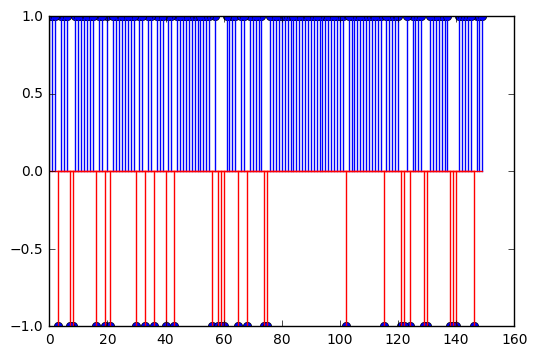

In [8]:
plt.stem(ind_training, np.ones(len(ind_training)))
plt.stem(ind_test, np.ones(len(ind_test)) * (-1), 'r')

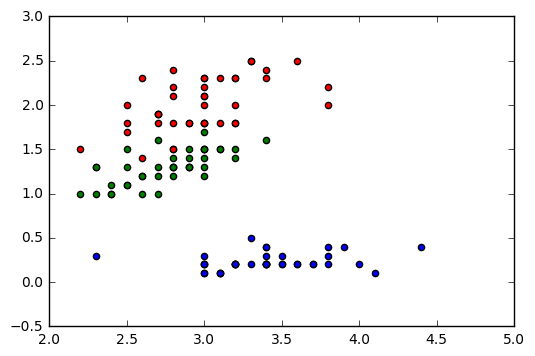

In [9]:
training_1 = np.intersect1d(ind_training, np.arange(0, 50))
training_2 = np.intersect1d(ind_training, np.arange(50, 100))
training_3 = np.intersect1d(ind_training, np.arange(100, 150))


plt.scatter(X[training_1,1], X[training_1,3])
plt.scatter(X[training_2,1], X[training_2,3], c='g')
plt.scatter(X[training_3,1], X[training_3,3], c='r')


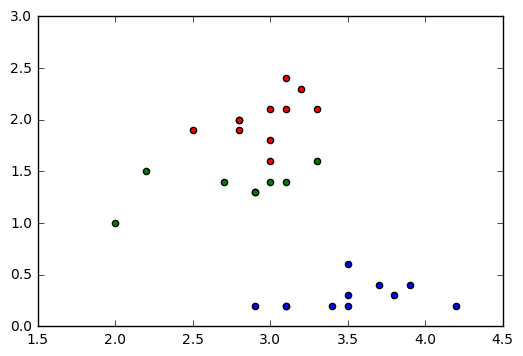

In [10]:
test_1 = np.intersect1d(ind_test, np.arange(0, 50))
test_2 = np.intersect1d(ind_test, np.arange(50, 100))
test_3 = np.intersect1d(ind_test, np.arange(100, 150))


plt.scatter(X[test_1,1], X[test_1,3])
plt.scatter(X[test_2,1], X[test_2,3], c='g')
plt.scatter(X[test_3,1], X[test_3,3], c='r')


In [11]:
# LDA classifier

In [12]:
from sklearn.lda import LDA
linear_clf = LDA()

C:\Users\vmatic\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [13]:
linear_clf.fit(X[ind_training,:], y[ind_training] )

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [14]:
xs = np.arange(0,10,0.5)

In [21]:
ys = -linear_clf.intercept_[0] - xs* linear_clf.coef_[0,0] / linear_clf.coef_[0,1]

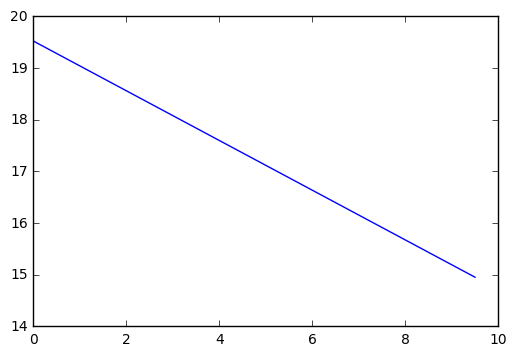

In [22]:
plt.plot(xs,ys)

In [ ]:
y_predicted_LDA = linear_clf.predict(X[ind_test])

In [ ]:
sum(y_predicted_LDA == y [ind_test])

In [ ]:
plt.stem(ind_test[y_predicted_LDA == y [ind_test]], np.ones(sum(y_predicted_LDA == y [ind_test])))
#plt.stem(ind_test[y_predicted_LDA != y [ind_test]], np.ones(sum(y_predicted_LDA != y [ind_test])), 'r')

In [ ]:
# KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
KMeans_cluster = KMeans(n_clusters=3)

In [ ]:
KMeans_cluster.fit(X[ind_training])

In [ ]:
KMeans_cluster.cluster_centers_

In [ ]:
KMeans_cluster.labels_

In [ ]:
y_predicted = KMeans_cluster.labels_

In [ ]:
#y_predicted [y_predicted==3]=0

In [ ]:
y[ind_training]

In [ ]:
y_predicted == y[ind_training]

In [ ]:
y_test_predicted = KMeans_cluster.predict(X[ind_test])

In [ ]:
y_test_predicted[y_test_predicted==0]=3
y_test_predicted[y_test_predicted==1]=0
y_test_predicted[y_test_predicted==3]=1



In [ ]:
sum (y_test_predicted == y[ind_test])

In [ ]:
# k nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X[ind_training ], y[ind_training])

In [ ]:
y_knn_predicted = knn.predict(X[ind_test])

In [ ]:
sum(y_knn_predicted == y[ind_test]) / len(ind_test)

In [ ]:
from sklearn.linear_model.logistic import LogisticRegression

In [ ]:
clf_logistic = LogisticRegression()

In [ ]:
clf_logistic.fit(X[ind_training], y[ind_training])

In [ ]:
y_logistic_test = clf_logistic.predict(X[ind_test])

In [ ]:
y_logistic_test 

In [ ]:
y[ind_test]

In [ ]:
sum(y_logistic_test == y[ind_test] )